# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
import pickle
sns.set()

## Loading Dataset

In [2]:
data = pd.read_csv("b_cancer.csv")

In [3]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# Exploratory Data Analysis

In [4]:
data.shape

(569, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [6]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


c:\users\manoj\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

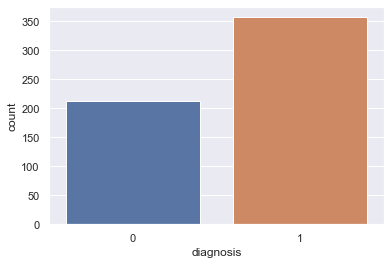

In [7]:
sns.countplot(data["diagnosis"])

In [8]:
data.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

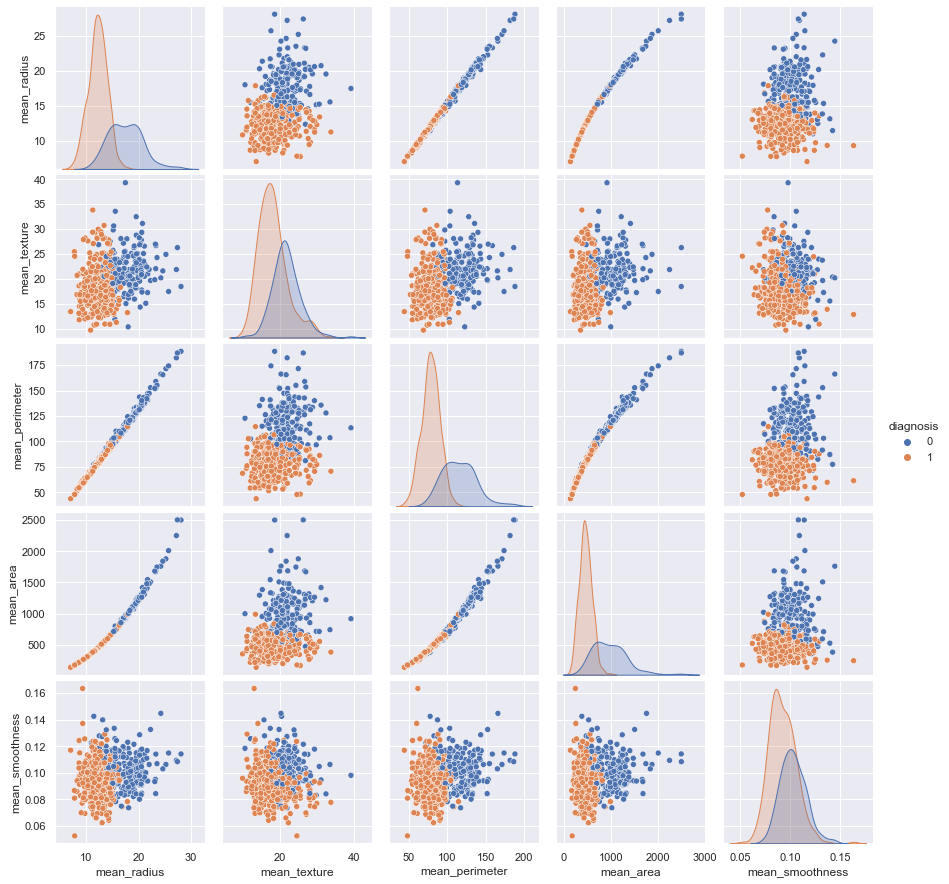

In [9]:
sns.pairplot(data, hue = "diagnosis")
plt.show()

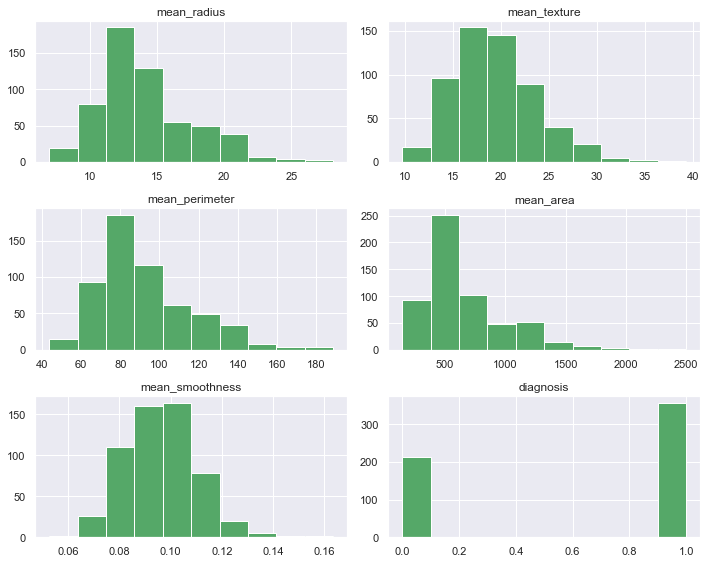

In [10]:
data.hist(color = "g", figsize = (10,8))
plt.tight_layout()
plt.show()

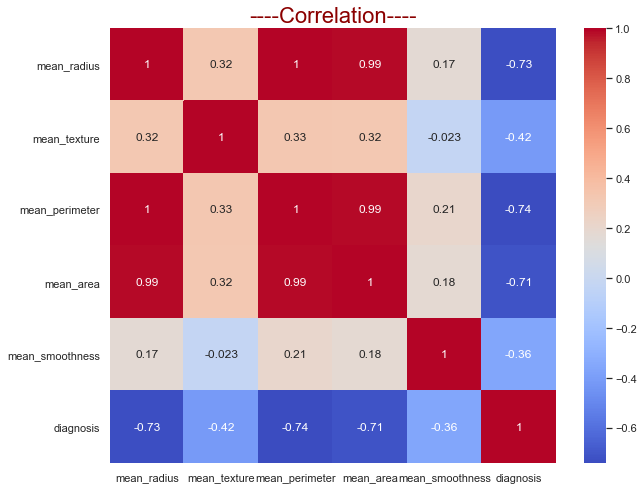

In [11]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),cmap = "coolwarm", annot = True)
plt.title("----Correlation----", size = 22, color = "darkred")
plt.show()

In [12]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


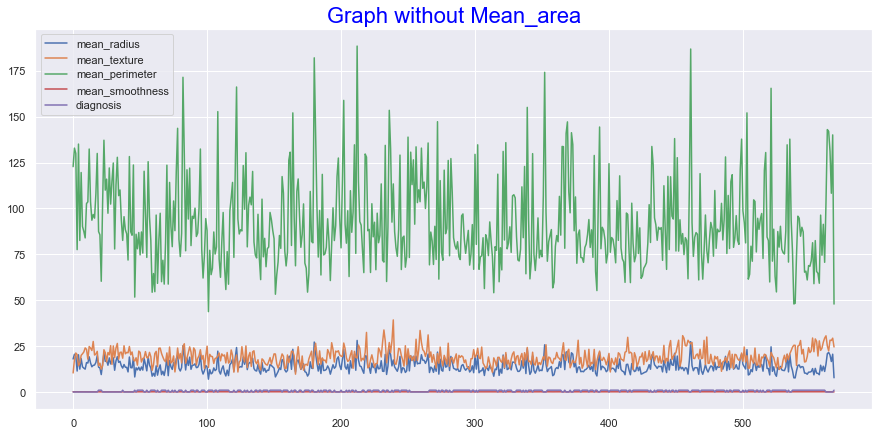

In [13]:
fig = data.drop(columns = ["mean_area"])
fig.plot(figsize = (15,7))
plt.title("Graph without Mean_area", size = 22, color = "blue")
plt.show()

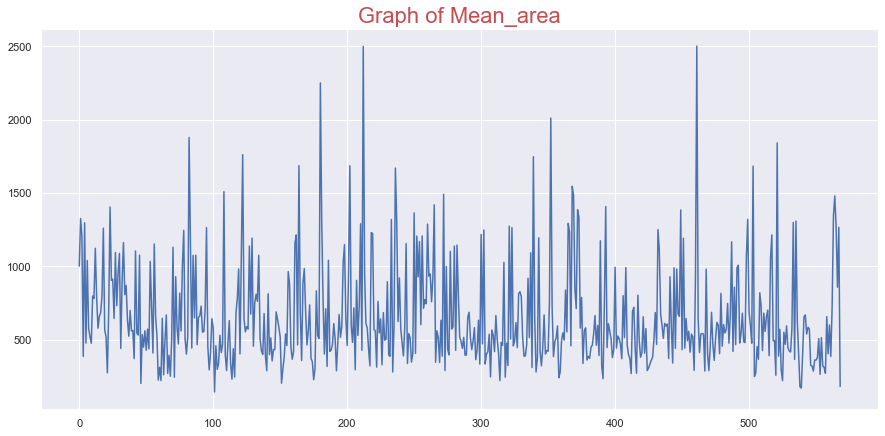

In [14]:
data["mean_area"].plot(figsize = (15,7))
plt.title("Graph of Mean_area", size = 22, color = "r")
plt.show()

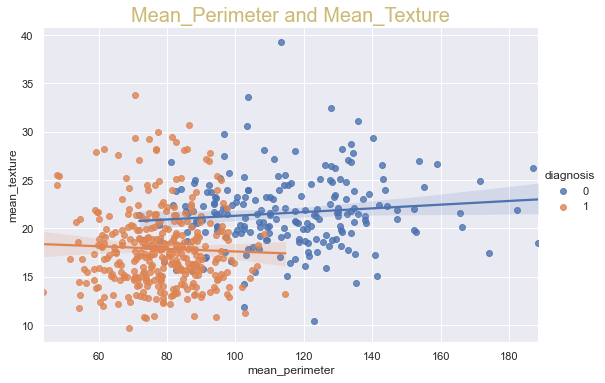

In [15]:
sns.lmplot(x ="mean_perimeter",y="mean_texture", hue = "diagnosis",data = data, height=5, aspect = 1.5)
plt.title("Mean_Perimeter and Mean_Texture", size = 20, color = "y")
plt.show()

<Figure size 720x576 with 0 Axes>

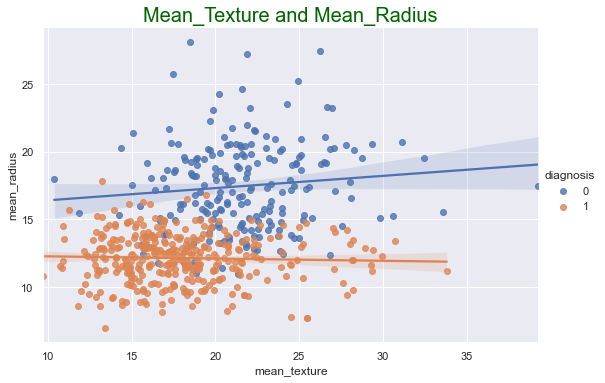

In [16]:
plt.figure(figsize=(10,8))
sns.lmplot(x = "mean_texture",y = "mean_radius",hue= "diagnosis",data = data, height = 5, aspect = 1.5)
plt.title("Mean_Texture and Mean_Radius", size = 20, color = "darkgreen")
plt.show()

In [17]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# Training and Spliting Dataset

In [18]:
x = data.drop(columns = ["diagnosis"])
y = data["diagnosis"]

In [19]:
X_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(C=1.5, n_jobs = 5)
lgr.fit(X_train,y_train)

LogisticRegression(C=1.5, n_jobs=5)

In [21]:
pre = lgr.predict(x_test)

In [22]:
pre

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
print(round(accuracy_score(pre, y_test)*100),"%")

94 %


In [25]:
confusion_matrix(pre,y_test)

array([[51,  6],
       [ 3, 83]], dtype=int64)

In [26]:
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        57
           1       0.93      0.97      0.95        86

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [27]:
pickle.dump(lgr,open('cancer.pkl','wb'))